# Socio-Economic Data Analysis and Visualization using Python and GridDB

Today, we will explore the socio-economic dataset which contains various metrics and social indicators for 66 major countries. This dataset is originally inspired by [UNData](http://data.un.org/Host.aspx?Content=About). We will learn more about the dataset in the later section. 

The objective of this tutorial is to give a sneak peek into the socio-economic data preprocessing and analysis. We will begin with loading the libraries and our dataset followed by data preprocessing. Later on, we will visualize the statistics using interactive widgets. 

The outline of this tutorial looks like as follows:
1. Prerequisites and Environment Set up. 
2. Introduction to the dataset 
3. Importing Libraries
4. Loading the Dataset
5. Data Preprocessing
6. Data Filtering and Basic Data Visualization
7. Interactive Data Visualization
8. Conclusion
9. References


## 1. Prerequisites and Environment Set up

This tutorial is carried out in Anaconda's Jupyter Notebook with Python version - 3.8.3 on Windows 10 Operating System. [Google Colab](https://colab.research.google.com/) also offers a similar environment and is cloud-based. Hence, it could be shared among users and devices. 

The following libraries are used in this tutorial. Make sure to install them before moving to the code.

1. [Pandas](https://pandas.pydata.org/docs/getting_started/install.html)
2. [Numpy](https://numpy.org/install/)
3. [Matplotlib](https://matplotlib.org/stable/users/installing/index.html)
4. [Regex](https://pypi.org/project/regex/)
5. [ipywidgets](https://pypi.org/project/ipywidgets/)

To install these packages using the command line, just type <code>pip install package-name</code> or <code>conda install package-name</code> if you are using Anaconda Navigator. 

Moreover, if you are using GridDB, these additional libraries will be required:

1. [GridDB C-client](https://github.com/griddb/c_client)
2. SWIG (Simplified Wrapper and Interface Generator)
3. [GridDB Python Client](https://github.com/griddb/python_client)

After installing the prerequisites, we go ahead and introduce today's dataset. 

## 2. Introduction to the Dataset

The motivation behind this socio-economic dataset is to be able to analyze country-specific data. But why is it important?

Country-specific data can be proven useful to analyze statistics, successful approaches for policies, etc. This data has been made open-source on [Kaggle](https://www.kaggle.com/datasets/sudalairajkumar/undata-country-profiles). It contains information about Population, GDP Growth, Agricultural Sector, etc. The dataset has 66 rows each row representing a country and 96 columns denoting a specific metric. 

Now that we have a little background about our dataset, let's load it into our python environment. But before that, we need to import the necessary libraries!

### Please Note:

We have made some changes to the column names in the original dataset by removing white spaces and special characters. The updated data can be downloaded from our repository.

## 3. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re
import ipywidgets as widgets

The cell will not return anything if executed successfully. In case of an error, kindly check the version of each package and see if it is compatible with your operating system.

Great! We have loaded the libraries successfully. Let's import our dataset.

## 4. Loading the Dataset

### Using Pandas

In [2]:
dataset = pd.read_csv('soci_econ_country_profiles.csv')
dataset.head()

,country,Region,Surface area (km2),Population_in_thousands_2017,"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy_Agriculture,...,"Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),"Population, female","Population, male",Tax revenue (% of GDP),"Taxes on income, profits and capital gains (% of revenue)",Urban population (% of total population)_y
0,Argentina,SouthAmerica,2780400,44271,16.2,95.9,632343,2.4,14564.5,6,...,NaN,79.726,72.924,76.372000,0.856138,22572521,21472290,10.955501,12.929913,91.749
1,Australia,Oceania,7692060,24451,3.2,99.3,1230859,2.4,51352.2,2.5,...,1.948647,84.600,80.500,82.500000,2.007966,12349632,12252228,21.915859,64.110306,85.904
2,Austria,WesternEurope,83871,8736,106.0,96.2,376967,1.0,44117.7,1.3,...,2.081269,84.000,79.400,81.643902,0.756179,4478340,4319226,25.355237,27.024073,58.094
3,Belarus,EasternEurope,207600,9468,46.7,87.0,54609,-3.9,5750.8,7.5,...,6.031837,79.200,69.300,74.129268,1.162417,5077542,4420722,13.019006,2.933101,78.134
4,Belgium,WesternEurope,30528,11429,377.5,97.3,455107,1.5,40277.8,0.7,...,2.125971,83.900,79.200,81.492683,0.910371,5766141,5609017,23.399721,33.727746,97.961


The <code>head</code> command displays the first five rows of the dataset. We can see there is an extra column <code>'Unnamed: 0'</code> which does not hold any significance, so let's go ahead and drop it.

## 5. Data Preprocessing

In [3]:
dataset.shape

(66, 95)

The <code>shape</code> command displays the dimension of the dataset. As mentioned before, this dataset has 66 instances and 95 attributes. However, for this tutorial, we will only be using 4 columns. Let's go ahead and create a new dataframe with only these columns. 

In [4]:
df = dataset[['country', 'Economy_Agriculture', 'Region', 'Population_in_thousands_2017']]
df.head()

,country,Economy_Agriculture,Region,Population_in_thousands_2017
0,Argentina,6,SouthAmerica,44271
1,Australia,2.5,Oceania,24451
2,Austria,1.3,WesternEurope,8736
3,Belarus,7.5,EasternEurope,9468
4,Belgium,0.7,WesternEurope,11429


Now that we have a limited number of columns, let's move onto the next step i.e. checking for missing values. <code>Null</code> or <code>NaN</code> values hinder with numerical operations. Therefore, it is important to check them before the actual analysis.

In [5]:
df.isna().sum()

country                         0
Economy_Agriculture             0
Region                          0
Population_in_thousands_2017    0
dtype: int64

Since, there are no null values, we can go ahead with our analysis.

In addition to null values, we also need to remove any special characters such as <code>@, ~,</code> etc. from column values. We will make use of regular expressions for this task. This will also make it easy to convert any <code>object</code> datatype to a <code>numeric</code> datatype. 

In [6]:
df = df.apply(lambda x: x.replace(r'[~]/^...$/', "", regex=True))
df = df.apply(lambda x: x.replace(r'~0.0', "0", regex=True))
df.head()

,country,Economy_Agriculture,Region,Population_in_thousands_2017
0,Argentina,6,SouthAmerica,44271
1,Australia,2.5,Oceania,24451
2,Austria,1.3,WesternEurope,8736
3,Belarus,7.5,EasternEurope,9468
4,Belgium,0.7,WesternEurope,11429


Now that we god rid of null values and special characters, let's have a look at the data types of each column. This, as well, will help us in numerical analysis and filtering, later on. 

In [7]:
df.dtypes

country                         object
Economy_Agriculture             object
Region                          object
Population_in_thousands_2017     int64
dtype: object

The <code>Economy_Agriculture</code> column has datatype - <code>object</code>. Let us convert it to <code>float</code>.

In [8]:
df['Economy_Agriculture'] = df['Economy_Agriculture'].astype(float)
df['Economy_Agriculture'].dtypes

dtype('float64')

Now that our data is processed, we can create a GridDB container and insert it using the python-client. But what is GridDB and why do we need it?

## 6. What is GridDB?

[GridDB](https://griddb.net/) is a scalable, in-memory no-SQL database. It has a unique key-container model which is designed to handle both metadata and time series data. Moreover, GridDB makes use of an in-memory architecture in addition to parallel processing to provide efficient performance with minimum delays. 

But why do we need a database?

### Why do we need it?

We have all heard the term 'Big Data' but what are the challenges that come with it? 

When we have huge amounts of data, we not only face storage issues but also integrity issues. For instance, what if we want to change a row or an attribute, is the same copy available for all the users in an organization? Will they see the update when it's being done?

If you are using a CSV file, then it could be chaotic to update and verify these changes among all users every time. Using a database management system tackles these issues. Additionally, with different kinds of access being given to the users, you can control who gets to manipulate what. 

The motivation behind GridDB is now clear. Let's see how can we insert the data into a GridDB container with the help of a python-client

## 7. Data Insertion into GridDB

With the help of GridDB's python-client, it is quite easy to interact with your data. In this section, we will first establish a connection to the node. Then, we will create a container to store the data. 

### a. Creating a connection

In [9]:
import griddb_python as griddb

factory = griddb.StoreFactory.get_instance()
host = "127.0.0.1:10001"
cluster = "myCluster"
db_user = "admin"
db_password = "admin"

try:
    gridstore = factory.get_store(notification_member=host, cluster_name=cluster, username=db_user, password=db_password)
    print("connection successful")
    
except griddb.GSException as e:
    for i in range(e.get_error_stack_size()):
        print("[",i,"]")
        print(e.get_error_code(i))
        print(e.get_location(i))
        print(e.get_message(i))

connection successful


If you run this execute this code and it prints </code>connection successful</code>, then a connection has been made. However, if you encounter an error, please check your credentials and the host's address as well as the port number. 

More information on how to start a node and setup the host name can be found in the [Quick Start guide by GridDB](https://www.toshiba-sol.co.jp/en/pro/griddb/docs-en/v4_3_2/GridDB_QuickStartGuide.html).

The code is not complete yet! We still need to create a container and define its schema.

### b. Container Creation

Within the <code>try</code> clause, we need to define a container. Thus, our final code will look like:

In [10]:
try:
    gridstore = factory.get_store(notification_member=host, cluster_name=cluster, username=db_user, password=db_password)
    print("connection successful")

    conInfo = griddb.ContainerInfo(name="socio_econ",
                    column_info_list = [["country", griddb.Type.STRING],
                                       ["Economy_Agriculture", griddb.Type.FLOAT],
                                       ["Region", griddb.Type.STRING],
                                       ["Population_in_thousands_2017", griddb.Type.INTEGER]],
                    type=griddb.ContainerType.COLLECTION)

    print(conInfo)

    socio_econ_container = gridstore.put_container(conInfo)
    print("container creation successful")

    socio_econ_container.put_rows(df)

    print("data insertion successful")


except griddb.GSException as e:
    for i in range(e.get_error_stack_size()):
        print("[",i,"]")
        print(e.get_error_code(i))
        print(e.get_location(i))
        print(e.get_message(i))

connection successful
<griddb_python.ContainerInfo; proxy of <Swig Object of type 'std::shared_ptr< griddb::ContainerInfo > *' at 0x7f85695dc060> >
container creation successful
data insertion successful


Here, we are creating a container name <code>socio_econ</code> which has the following columns:
- Country (Type: String)
- Economy_Agriculture (Type: Float)
- Region (Type: String)
- Population_in_thousands_2017 (Type: Integer)

If this executes successfully, the output will look like this:

<img src="griddb1.png" alt="Alternative text" />

### c. Few things to note

During the data insertion, I encountered a couple of errors. Here are some things to keep in mind to avoid this situation:

- The order of the schema is quite important and it should match with the columns of your dataframe.

- Insertion could result in an <code>[1008:CM_LIMITS_EXCEEDED]</code> error. For me, it got resolved by removing the special characters and spaces from column names. 

- If your container type is <code>TIMESERIES</code>, then a <code>ROWKEY</code> must be defined. A <code>ROWKEY</code> is a primary key for your dataset. It is not need if the container type is <code>COLLECTION</code> which is the case for this dataset. 

- A <code>ROWKEY</code> is either a STRING, INTEGER, LONG or TIMESTAMP column. If you do not specify a ROWKEY column, then it takes the first column as the default ROWKEY. If your first column is not from those datatypes, then it would throw an <code>[140009:CC_UNSUPPORTED_KEY_TYPE]</code>. 

## 8. Reading Data from GridDB

After inserting the data into our gridDB container, it's time to read it and load it into our python environment. This operation is quite simple as well.

In [11]:
import griddb_python as griddb
print("import successful")

factory = griddb.StoreFactory.get_instance()

host = "127.0.0.1:10001"
cluster = "myCluster"
db_user = "admin"
db_password = "admin"


try:
        gridstore = factory.get_store(notification_member=host, cluster_name=cluster, username=db_user, password=db_password)
        cont = gridstore.get_container("socio_econ")
        if cont is None:
            print("Does not exist")
        print("connection successful")

        query = cont.query("select *")
        rs = query.fetch(False)
        df = rs.fetch_rows()
        print(type(df))
        print(df.head())

except griddb.GSException as e:
    
    for i in range(e.get_error_stack_size()):
        print("[",i,"]")
        print(e.get_error_code(i))
        print(e.get_location(i))
        print(e.get_message(i))

import successful
connection successful
<class 'pandas.core.frame.DataFrame'>
     country  Economy_Agriculture         Region  Population_in_thousands_2017
0  Argentina                  6.0   SouthAmerica                         44271
1  Australia                  2.5        Oceania                         24451
2    Austria                  1.3  WesternEurope                          8736
3    Belarus                  7.5  EasternEurope                          9468
4    Belgium                  0.7  WesternEurope                         11429


The output looks like as follows:

<img src="griddb2.png" alt="Alternative text" />

If you are new to GridDB, there's a [YouTube tutorial](https://www.youtube.com/watch?v=GMURnoS9bK4) that covers the basic operations such as data insertion, container creation, etc. 

Our data is now ready to be used! It's time to move on to the next section - Data Filtering and Basic Data Visualization.

## 9. Data Filtering and Basic Data Visualization

One of the first columns to notice is the <code>Population</code> column. How about we want to print the most or least populated countries on this list? 

This can be achieved via the <code>sort_value()</code> function. We will sort our dataset in descending order of population and get the 5 most populated countries. 

In [12]:
top_population = df.sort_values(by=['Population_in_thousands_2017'], ascending=False).iloc[:5]
top_population

,country,Economy_Agriculture,Region,Population_in_thousands_2017
11,China,9.2,EasternAsia,1409517
24,India,17.0,SouthernAsia,1339180
63,United States of America,1.0,NorthernAmerica,324460
25,Indonesia,14.0,South-easternAsia,263991
6,Brazil,5.2,SouthAmerica,209288


As we can see, the <code>sort_value()</code> function here takes 2 arguments. The <code>ascending=False</code> column is optional and its default value is <code>True</code>. The <code>iloc</code> function helps us to retrieve the first 5 rows of the resulting dataframe. 

We can also plot the same information using a Bar Graph. This can be achieved by using the <code>plot()</code> function directly on our sorted dataframe.

<AxesSubplot:title={'center':'The 5 most populated countries in the world.'}, ylabel='country'>

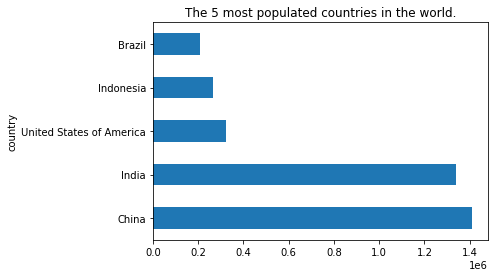

In [13]:
top_population.plot(x= 'country', y ='Population_in_thousands_2017', kind="barh", title="The 5 most populated countries in the world.", legend=False)

The X-axis represents the <code>population</code> parameter whereas the Y-axis represents the country name. You can do much more with [Dataframe.plot()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) such as setting the title, legend, etc.

Great! Now you know how to sort our dataset using any column. But what if we want to calculate any statistic based on this data? For instance, mean population or total population for a region?

We can do so by using the <code>groupby</code> clause in Pandas. But before that, let us look at how many different regions are there in our dataset.

In [14]:
print(df['Region'].unique())
print(len(df['Region'].unique()))

['SouthAmerica' 'Oceania' 'WesternEurope' 'EasternEurope' 'SouthernEurope'
 'NorthernAmerica' 'EasternAsia' 'WesternAsia' 'NorthernEurope'
 'NorthernAfrica' 'SouthernAsia' 'South-easternAsia' 'CentralAmerica'
 'SouthernAfrica']
14


So, there are 13 regions and each country is a part of one region. We can group our data using these regions and calculate statistical values for each. For this example, let us calculate the mean value of <code>Economy: Agriculture (% of GVA)</code> using the <code>agg()</code> function.

In [15]:
agriculture_share = df.groupby('Region').agg({'Economy_Agriculture':'mean'})
agriculture_share

,Economy_Agriculture
Region,
CentralAmerica,3.600000
EasternAsia,3.200000
EasternEurope,5.444444
NorthernAfrica,11.200000
NorthernAmerica,1.400000
NorthernEurope,1.937500
Oceania,4.500000
South-easternAsia,10.183333
SouthAmerica,5.440000


Note that the same could be achieved by <code>dataset_filter.groupby('Region')['Economy: Agriculture (% of GVA)'].mean()</code>. But the [agg() function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html) allows us to calculate more than one statistic at once for one or more columns. 

Let's go ahead and plot this as well.

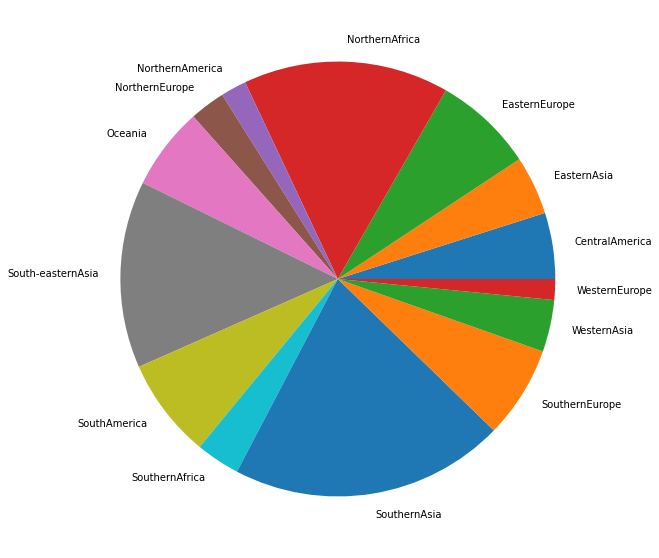

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(x=agriculture_share['Economy_Agriculture'], labels=agriculture_share['Economy_Agriculture'].index)
plt.show()

Awesome! Now we know how to plot both individual and aggregate values using Pandas and Matplotlib. But for datasets such as this, there is a huge number of columns to be analyzed. Each column represents a different statistic. 

What if we want to plot each column? One way that comes to my mind is to put up a for loop but that could be chaotic. The <code>print()</code> function will display a long list of graphs. It's difficult to scroll through in such a case. 

Widgets come to our rescue here. Let's try to create interactive plots where you can select from a drop-down box what you want to see. 

## 7. Interactive Data Visualization 

Let's again group our data by <code>Region</code> and calculate the mean for all attributes.  

In [17]:
region_data = df.groupby('Region').mean()

Now, we will pass all our columns to our widget object. We will also define a <code>plotbar()</code> function which takes this data and plots a bar graph. 

In [18]:
@widgets.interact(Data = region_data.columns)
def plotbar(Data):
  fig, ax = plt.subplots(figsize=(25,7))
  ax.bar(region_data.index, height = region_data[Data])
  ax.axhline(region_data[Data].mean(), ls='--', color='red', label='Mean')
  ax.set_title(Data)
  ax.legend()

interactive(children=(Dropdown(description='Data', options=('Economy_Agriculture', 'Population_in_thousands_20…

Using a similar logic, we can also plot pie charts for the same <code>groupby</code> object.

In [19]:
@widgets.interact(Data = region_data.columns)
def plotpie(Data):
  fig, ax = plt.subplots(figsize=(10,10))
  ax.pie(x=region_data[Data], labels=region_data.index)
  ax.set_title(Data, size=20)

interactive(children=(Dropdown(description='Data', options=('Economy_Agriculture', 'Population_in_thousands_20…

In both plots, you can just scroll down to select the attribute you want to visualize. Thus, this is an easier and more comprehensive approach.

## 8. Conclusion 

In this tutorial, we analyzed the socio-economic dataset. We started with preprocessing followed by filtering and visualization. We also saw how to make interactive graphs using widgets. 

Moreover, we covered how GridDB makes your life easier. Download [GridDB](https://www.kaggle.com/datasets/sudalairajkumar/undata-country-profiles) and get your journey started today!

## 9. References

1. https://www.kaggle.com/datasets/sudalairajkumar/undata-country-profiles
2. https://www.kaggle.com/code/henriquegaspar/transforming-and-clustering-socioeconomic-data